In [240]:
import pandas as pd

hearings = pd.read_excel('hearings_count.xlsx')

In [241]:
len(hearings)

23126

In [277]:
df = pd.read_excel('20th_bills_history.xlsx')

In [243]:
df.columns

Index(['의안번호', '임기대수', '법안코드', '법안명', '제안자', '소속정당', '당선횟수', '소속위1', '소속위2',
       '소속위3', '소속위4', '소속위원회', '직책', '공동발의자수', '소관위1', '소관위2', '소관위3', '소관위4',
       '소관위5', '소관위', '처리구분', '대안법안', '총소요일', '접수일자', '위원회 회부일', '위원회 상정일',
       '위원회 처리일', '체계자구 회부일', '체계자구 상정일', '체계자구 처리일', '본회의 상정일', '본회의 의결일',
       '정부이송', '공포', '소속정당명', '소속정당 구분', '소요개월', '접수_위원회회부', '접수_위원회상정',
       '접수_위원회처리', '접수_체계회부', '접수_체계상정', '접수_체계처리', '접수_본회의상정', '접수_본회의의결',
       '접수_정부이송', '접수_공포', '최종처리일', '현재일자', '총소요일수', '년도_접수일', '년도_처리일',
       '월_접수일', '월_처리일', '제안', '위원회 회부', '위원회 상정', '위원회 처리', '체계자구 회부',
       '체계자구 상정', '체계자구 처리', '본회의 상정', '본회의 의결', '정부이송.1', '공포.1', '처리단계',
       '법안명 구분', '입법형태', '대안여부', '총 발의자 수', '총 발의자 수 구간', '선출형태', '지역구명',
       '처리구분_8유형', '처리구분_3유형', '소관위 구분', '제안방식', '여야구분', '당선수구분', '의원입법',
       '의원입법성과지수_구간', '차기국회당선', '제안자한자명', '법안수_가중치', '제안내용', 'Unnamed: 85',
       'Unnamed: 86'],
      dtype='object')

In [278]:
df = df[df['접수일자'] >= '2018-07-13'].reset_index()

In [279]:
for i in range(len(df)):
    if type(df.loc[i, '위원회 상정일']) == pd._libs.tslibs.timestamps.Timestamp:
        df.loc[i, '상임위 상정 여부'] = 1
    else:
        df.loc[i, '상임위 상정 여부'] = 0

In [280]:
df_re = df[['법안코드', '접수일자', '소관위', '제안자', '소속정당 구분', '상임위 상정 여부']]

In [281]:
df_re = df_re.rename(columns={'법안코드': '법안번호', '소속정당 구분':'정당'})

In [282]:
df_re=df_re.reset_index()
df_re

,index,법안번호,접수일자,소관위,제안자,정당,상임위 상정 여부
0,0,PRC_W1Z8Q0C7U1W3Y1R9A0W7O4Z8C7I1B9,2018-07-13,정무위원회,백혜련,더불어민주당,1.0
1,1,PRC_W1P8H0U7O1P3T1D9C0U4U1O3I3P4S1,2018-07-13,정무위원회,박정,더불어민주당,1.0
2,2,PRC_B1D8D0L7N1U3Z1B8O4G1K1M8C2A7Q7,2018-07-13,정무위원회,이인영,더불어민주당,1.0
3,3,PRC_B1L8S0W7D1P3O1H9G0J1D0M8G8C3K2,2018-07-13,기획재정위원회,김광수,민주평화당,1.0
4,4,PRC_R1T8S0N7Y1R3W1C8Q5V2J3D7Y1I9Q8,2018-07-13,기획재정위원회,김상훈,자유한국당,1.0
...,...,...,...,...,...,...,...
10227,10227,PRC_Q2Q0Q0K5Z0J6P1S5D3W2C2J1H5L3B1,2020-05-20,여성가족위원회,위원장,NaN,1.0
10228,10228,PRC_S2M0L0K5L0Y6Y1S5Z3S1B4J2N0F8J8,2020-05-20,여성가족위원회,위원장,NaN,1.0
10229,10229,PRC_V2N0M0H5D0B6G1L5N3I0O3W8F5B6C5,2020-05-20,여성가족위원회,위원장,NaN,1.0
10230,10230,PRC_K2F0C0Y5B2D2C1Z5B2F6T4S2K9N8V8,2020-05-22,법제사법위원회,김병관,더불어민주당,0.0


In [283]:
df2 = pd.read_excel('21th_history.xlsx')

for i in range(len(df2)):
    if type(df2.loc[i, '위원회 상정일']) == pd._libs.tslibs.timestamps.Timestamp:
        df2.loc[i, '상임위 상정 여부'] = 1
    else:
        df2.loc[i, '상임위 상정 여부'] = 0
        
        
df_re2 = df2[['법안코드', '접수일자', '소관위', '제안자', '소속정당 구분', '상임위 상정 여부']]
df_re2 = df_re2.rename(columns={'법안코드': '법안번호', '소속정당 구분':'정당'})

In [284]:
bills = pd.concat([df_re, df_re2]).reset_index()
del bills['index']
del bills['level_0']

In [285]:
df = pd.merge(hearings, bills, how='left', on='법안번호')

In [286]:
party = pd.read_excel('party_20th.xlsx')

In [287]:
from datetime import datetime
period8 = party[['name', 'period 8']].rename(columns={'name':'화자'})
df8 = df[df['접수일자'] <= datetime.fromisoformat('2018-12-18') ]
df_merged8 = pd.merge(df8, period8, how='left', on='화자')

In [288]:
period9 = party[['name', 'period 9']].rename(columns={'name':'화자'})
df0 = df[df['접수일자'] > datetime.fromisoformat('2018-12-18')]
df9 = df0[df0['접수일자'] <= datetime.fromisoformat('2019-08-16') ]
df_merged9 = pd.merge(df9, period9, how='left', on='화자')

In [289]:
period10 = party[['name', 'period 10']].rename(columns={'name':'화자'})
df0 = df[df['접수일자'] > datetime.fromisoformat('2019-08-16')]
df10 = df0[df0['접수일자'] <= datetime.fromisoformat('2020-05-29') ]
df_merged10 = pd.merge(df10, period10, how='left', on='화자')

In [290]:
party_21th = pd.read_csv('party_21th.csv')

In [291]:
party_21th = party_21th[['emp_nm', 'poly_nm']]

In [292]:
party_21th = party_21th.rename(columns={'emp_nm':'화자'})

In [293]:
df11 = df[df['접수일자'] > datetime.fromisoformat('2020-05-29')]
df_merged11 = pd.merge(df11, party_21th, how='left', on='화자')

In [294]:
df_merged8 = df_merged8.rename(columns={'period 8':'화자 정당'})
df_merged9 = df_merged9.rename(columns={'period 9':'화자 정당'})
df_merged10 = df_merged10.rename(columns={'period 10':'화자 정당'})
df_merged11 = df_merged11.rename(columns={'poly_nm':'화자 정당'})

In [295]:
df_re = pd.concat([df_merged8, df_merged9, df_merged10, df_merged11])

In [296]:
df_re = df_re.rename(columns={'정당':'제안자 정당'})

In [297]:
df_re = df_re.reset_index()

In [298]:
bill_no = list(set(df_re['법안번호']))

In [299]:
for i in range(len(df_re)):
    if df_re.loc[i, '접수일자'] < datetime.fromisoformat('2020-05-29'): #20대 국회 하반기인 경우
        if df_re.loc[i, '소관위'] == '법제사법위원회' or df_re.loc[i, '소관위'] == '국토교통위원회' or df_re.loc[i, '소관위'] == '보건복지위원회':
            df_re.loc[i, '상임위원장 정당'] = '자유한국당'
        elif df_re.loc[i, '소관위'] == '외교통일위원회' or df_re.loc[i, '소관위'] == '환경노동위원회' or df_re.loc[i, '소관위'] == '산업통상자원중소벤처기업위원회':
            df_re.loc[i, '상임위원장 정당'] = '자유한국당'
        elif df_re.loc[i, '소관위'] == '교육위원회':
            df_re.loc[i, '상임위원장 정당'] = '자유한국당'
        elif df_re.loc[i, '소관위'] == '과학기술정보방송통신위원회' or df_re.loc[i, '소관위'] == '국방위원회' or df_re.loc[i, '소관위'] == '국회운영위원회':
            df_re.loc[i, '상임위원장 정당'] = '더불어민주당'
        elif df_re.loc[i, '소관위'] == '기획재정위원회' or df_re.loc[i, '소관위'] == '정무위원회' or df_re.loc[i, '소관위'] == '행정안전위원회':
            df_re.loc[i, '상임위원장 정당'] = '더불어민주당'
        elif df_re.loc[i, '소관위'] == '여성가족위원회' or df_re.loc[i, '소관위'] == '문화체육관광위원회':
            df_re.loc[i, '상임위원장 정당'] = '더불어민주당'
        elif df_re.loc[i, '소관위'] == '농림축산식품해양수산위원회' or df_re.loc[i, '소관위'] == '정보위원회':
            df_re.loc[i, '상임위원장 정당'] = '민생당'
    else:
        df_re.loc[i, '상임위원장 정당'] = '더불어민주당'


In [300]:
for i in range(len(df_re)):
    if df_re.loc[i, '제안자'] == '위원장':
        df_re.loc[i, '제안자 정당'] = df_re.loc[i, '상임위원장 정당']

In [301]:
for i in range(len(df_re)):
    if df_re.loc[i, '제안자'] == '정부':
        df_re.loc[i, '제안자 정당'] = '더불어민주당'

In [302]:
bill_no = list(set(df_re['법안번호']))

cnt_list = []

for no in bill_no:
    bill_df = df_re[df_re['법안번호']==no].reset_index()
    cnt = 0
    for i in range(len(bill_df)):
        if bill_df['제안자 정당'][0] != bill_df.loc[i, '화자 정당'] and type(bill_df.loc[i, '화자 정당']) == str:
            cnt+=bill_df.loc[i, '횟수']
    cnt_list.append(cnt)

bill_cnt = pd.DataFrame({'법안번호':bill_no, '반대당발언횟수': cnt_list})

In [303]:
bill_df_fin = pd.merge(bills, bill_cnt, how='left', on='법안번호')

In [304]:
bill_df_fin

,법안번호,접수일자,소관위,제안자,정당,상임위 상정 여부,반대당발언횟수
0,PRC_W1Z8Q0C7U1W3Y1R9A0W7O4Z8C7I1B9,2018-07-13,정무위원회,백혜련,더불어민주당,1.0,NaN
1,PRC_W1P8H0U7O1P3T1D9C0U4U1O3I3P4S1,2018-07-13,정무위원회,박정,더불어민주당,1.0,NaN
2,PRC_B1D8D0L7N1U3Z1B8O4G1K1M8C2A7Q7,2018-07-13,정무위원회,이인영,더불어민주당,1.0,NaN
3,PRC_B1L8S0W7D1P3O1H9G0J1D0M8G8C3K2,2018-07-13,기획재정위원회,김광수,민주평화당,1.0,NaN
4,PRC_R1T8S0N7Y1R3W1C8Q5V2J3D7Y1I9Q8,2018-07-13,기획재정위원회,김상훈,자유한국당,1.0,NaN
...,...,...,...,...,...,...,...
16553,PRC_K2G0C1V2I1L0E1F0Y5L2I0Y7R4H7T3,2020-12-15,국토교통위원회,이주환,국민의힘,0.0,NaN
16554,PRC_M2M0O1F2C1F5Q1R0Z2L6Q3O0B7H7R8,2020-12-15,국토교통위원회,윤재갑,더불어민주당,0.0,NaN
16555,PRC_R2I0U1U2Z1O5F1I0W1G0R4K9F5O7K2,2020-12-15,정무위원회,윤창현,국민의힘,0.0,NaN
16556,PRC_O2A0R1C2R1L5B1T0M0H8S3C8B5K2D8,2020-12-15,행정안전위원회,박대출,국민의힘,0.0,NaN


In [305]:
bill_df_fin.to_csv('df_bills_w_remarks_cnt_re2.csv', encoding='utf-8-sig')

In [5]:
import pandas as pd

df20 = pd.read_excel('20th_sponsorship_0104.xlsx')

In [17]:
df20.columns

Index(['의안번호', '의안명', '제안일자', '처리결과', '제안자직급', '대수', '의안종류', '대표발의자',
       '대표발의자 정당', '의안제안 코드', '당선횟수', '당선지역', '한자이름', '발의자', '발의자 정당', '구분',
       '발의자당선횟수', '발의자당선지역', '발의자한자이름'],
      dtype='object')

In [8]:
for i in range(len(df20)):
    if df20.loc[i, '발의자당선횟수'] == '초선':
        df20.loc[i, '발의자당선횟수'] = 1
    elif df20.loc[i, '발의자당선횟수'] == '재선':
        df20.loc[i, '발의자당선횟수'] = 2
    elif df20.loc[i, '발의자당선횟수'] == '3선':
        df20.loc[i, '발의자당선횟수'] = 3
    elif df20.loc[i, '발의자당선횟수'] == '4선':
        df20.loc[i, '발의자당선횟수'] = 4
    elif df20.loc[i, '발의자당선횟수'] == '5선':
        df20.loc[i, '발의자당선횟수'] = 5
    elif df20.loc[i, '발의자당선횟수'] == '6선':
        df20.loc[i, '발의자당선횟수'] = 6
    elif df20.loc[i, '발의자당선횟수'] == '7선':
        df20.loc[i, '발의자당선횟수'] = 7
    elif df20.loc[i, '발의자당선횟수'] == '8선':
        df20.loc[i, '발의자당선횟수'] = 8

In [9]:
df20.to_csv('20th_sponsorship_0104.csv', encoding='utf-8-sig')

In [10]:
df20_re = df20[df20['구분']!='대표']  #대표발의자 제외하기

In [14]:
df20_re = df20_re.fillna(0)

In [16]:
import numpy as np
extra_var1 = df20_re.pivot_table(index=['의안번호'], values=['발의자당선횟수'], aggfunc=np.mean)

In [18]:
df20_re = df20_re[df20_re['발의자당선횟수']!=0]

In [25]:
from tqdm import tqdm

party_set = []

bill_no = list(set(df20_re['의안번호']))

for no in tqdm(bill_no):
    bill = df20_re[df20_re['의안번호']==no]
    parties = set(bill['발의자 정당'])
    if len(parties) >= 2:
        party_set.append(1)
    else:
        party_set.append(0)

100%|█████████████████████████████████████████| 21913/21913 [04:38<00:00, 78.79it/s]


In [26]:
extra_var2 = pd.DataFrame({'의안번호': bill_no, '정당다양성':party_set})

In [29]:
extra_var1 = extra_var1.reset_index()

In [31]:
df_extra = pd.merge(extra_var1, extra_var2, how='left', on='의안번호')

In [67]:
df_extra.to_csv('20th_bill_extra.csv', encoding='utf-8-sig')

In [34]:
df21 = pd.read_excel('21th_sponsorship_0104.xlsx')

In [37]:
for i in range(len(df21)):
    if df21.loc[i, '당선횟수'] == '초선':
        df21.loc[i, '당선횟수'] = 1
    elif df21.loc[i, '당선횟수'] == '재선':
        df21.loc[i, '당선횟수'] = 2
    elif df21.loc[i, '당선횟수'] == '3선':
        df21.loc[i, '당선횟수'] = 3
    elif df21.loc[i, '당선횟수'] == '4선':
        df21.loc[i, '당선횟수'] = 4
    elif df21.loc[i, '당선횟수'] == '5선':
        df21.loc[i, '당선횟수'] = 5
    elif df21.loc[i, '당선횟수'] == '6선':
        df21.loc[i, '당선횟수'] = 6
    elif df21.loc[i, '당선횟수'] == '7선':
        df21.loc[i, '당선횟수'] = 7
    elif df21.loc[i, '당선횟수'] == '8선':
        df21.loc[i, '당선횟수'] = 8

In [38]:
df21.to_csv('21th_sponsorship_0104.csv', encoding='utf-8-sig')

In [39]:
df21_re = df21[df21['구분']!='대표']  #대표발의자 제외하기
df21_re = df21_re.fillna(0)

In [41]:
extra_var1_1 = df21_re.pivot_table(index=['의안번호'], values=['당선횟수'], aggfunc=np.mean)
extra_var1_1 = extra_var1_1.reset_index()

In [86]:
extra_var1_1

,의안번호,당선횟수
0,PRC_A2A0D1P2T1X6K1X5T4Y4T2H5A8S2G6,1.555556
1,PRC_A2A0J0O6W0A8F1Z5U0P9X0O3F0E4R3,2.166667
2,PRC_A2A0K1E2K1H5T0S9R3B6G1M0J3V1T0,1.125000
3,PRC_A2A0O0N6D2X3A1B3N3V7V1R8T9Z6N3,1.333333
4,PRC_A2A0T0R9F1S4W1Q5N2G5I3Q0J4F9H2,1.818182
...,...,...
6519,PRC_Z2Z0B0G7Y1S4J1Y7H4L5S4W5I9C8E8,1.333333
6520,PRC_Z2Z0H1Q1E2F6T1K2L0C2T1F2D1M1O5,1.444444
6521,PRC_Z2Z0I0M9X1D4N1H0Z5L4J4I2X3U8A3,1.300000
6522,PRC_Z2Z0K0U9V1D1Z1Z7Y3E1R3I1O9F4D9,1.300000


In [42]:
df21_re = df21_re[df21_re['당선횟수']!=0]

In [44]:
party_set_re = []

bill_no_re = list(set(df21_re['의안번호']))

for no in tqdm(bill_no_re):
    bill = df21_re[df21_re['의안번호']==no]
    parties = set(bill['정당'])
    party_set_re.append(len(parties))
    if len(parties) >= 2:
        party_set_re.append(1)
    else:
        party_set_re.append(0)

100%|██████████████████████████████████████████| 6494/6494 [00:26<00:00, 247.40it/s]


In [45]:
extra_var2_1 = pd.DataFrame({'의안번호': bill_no_re, '정당다양성':party_set_re})

In [68]:
df_extra_re = pd.merge(extra_var1_1, extra_var2_1, how='left', on='의안번호')

In [69]:
df_extra_re

,의안번호,당선횟수,정당다양성
0,PRC_A2A0D1P2T1X6K1X5T4Y4T2H5A8S2G6,1.555556,0.0
1,PRC_A2A0J0O6W0A8F1Z5U0P9X0O3F0E4R3,2.166667,0.0
2,PRC_A2A0K1E2K1H5T0S9R3B6G1M0J3V1T0,1.125000,0.0
3,PRC_A2A0O0N6D2X3A1B3N3V7V1R8T9Z6N3,1.333333,0.0
4,PRC_A2A0T0R9F1S4W1Q5N2G5I3Q0J4F9H2,1.818182,0.0
...,...,...,...
6519,PRC_Z2Z0B0G7Y1S4J1Y7H4L5S4W5I9C8E8,1.333333,0.0
6520,PRC_Z2Z0H1Q1E2F6T1K2L0C2T1F2D1M1O5,1.444444,0.0
6521,PRC_Z2Z0I0M9X1D4N1H0Z5L4J4I2X3U8A3,1.300000,1.0
6522,PRC_Z2Z0K0U9V1D1Z1Z7Y3E1R3I1O9F4D9,1.300000,0.0


In [70]:
df_extra_re = df_extra_re.rename(columns={"당선횟수": "공동발의평균선수"})

In [71]:
df_extra = df_extra.rename(columns={"발의자당선횟수": "공동발의평균선수"})

In [72]:
df_extra_re.to_csv('21th_bill_extra.csv', encoding='utf-8-sig')

In [73]:
df_extra_cc = pd.concat([df_extra, df_extra_re])

In [74]:
df_extra_cc.to_csv('bill_extra_var.csv', encoding='utf-8-sig')

In [53]:
bill_df = pd.read_csv('12월31일예측/bills_1231.csv')

In [76]:
df_extra_cc = df_extra_cc.rename(columns = {'의안번호':'법안코드'})

In [78]:
df_fin = pd.merge(bill_df, df_extra_cc, how='left', on='법안코드')
df_fin.to_csv('bills_df_0104.csv', encoding='utf-8-sig')

In [80]:
df_fin.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', '의안번호', '법안코드', '법안명',
       '제안자', '접수일자', '당선횟수', '공동발의자수', '입법형태', '선출형태', '처리구분', 'num_seats',
       'party', '상임위원장 소속', '보건복지위원회', '행정안전위원회', '산업통상자원중소벤처기업위원회',
       '문화체육관광위원회', '국회운영위원회', '법제사법위원회', '국방위원회', '국토교통위원회', '기획재정위원회',
       '특별위원회', '여성가족위원회', '농림축산식품해양수산위원회', '외교통일위원회', '정보위원회',
       '과학기술정보방송통신위원회', '환경노동위원회', '교육위원회', '정무위원회', '제안내용', '제안내용_re', '국회',
       '정당/선거', '안보', '사법', '행정', '재정', '중소기업', '에너지', '부동산', '금융', '자동차',
       '건설/기계/조선', '유통/무역', 'IT', '농축산', '복지', '의료/보건', '도시/교통', '교육', '환경',
       '노동', '치안/안전', '가족', '여성', '예체능', '분류', '분류값', '상임위 상정 여부', '반대당발언횟수',
       '당직여부', '의원_성별', '공동발의평균선수', '정당다양성'],
      dtype='object')

In [109]:
data = df_fin[['의안번호', '법안코드', '법안명', '제안자', '접수일자', '당선횟수', '공동발의자수', 
       '입법형태', '선출형태', '처리구분', 'num_seats', 'party', '보건복지위원회',
       '행정안전위원회', '산업통상자원중소벤처기업위원회', '문화체육관광위원회', '국회운영위원회', '법제사법위원회',
       '국방위원회', '국토교통위원회', '기획재정위원회', '특별위원회', '여성가족위원회', '농림축산식품해양수산위원회',
       '외교통일위원회', '정보위원회', '과학기술정보방송통신위원회', '환경노동위원회', '교육위원회', '정무위원회',
       '국회', '정당/선거', '안보', '사법', '행정', '재정', '중소기업', '에너지',
       '부동산', '금융', '자동차', '건설/기계/조선', '유통/무역', 'IT', '농축산', '복지', '의료/보건',
       '도시/교통', '교육', '환경', '노동', '치안/안전', '가족', '여성', '예체능','상임위 상정 여부', '반대당발언횟수', '공동발의평균선수',  '정당다양성']]

data = pd.get_dummies(data,columns=['입법형태','선출형태', 'party','상임위 상정 여부', '정당다양성'])
data['id']=range(len(data))

train = data.sample(13246,replace=False,random_state=2020).reset_index().drop(['index'],axis=1)
test = data.loc[ ~data['id'].isin(train['id']) ].reset_index().drop(['index'],axis=1)

col = list(data.columns)
col.remove('처리구분')
col.remove('id')
col.remove('접수일자')
col.remove('의안번호')
col.remove('제안자')
col.remove('법안명')
col.remove('법안코드')

In [157]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

params = [
    {'n_estimators': [200, 300, 400],
    'learning_rate': [0.05],
    'max_depth':[6,7],
    'scale_pos_weight':[1.2, 2.6],
    'reg_alpha': [0, 1, 2]}    
]

xgb = XGBClassifier()

grid_search = GridSearchCV(xgb, params, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(train[col], train['처리구분'])

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [158]:
grid_search.best_params_

{'learning_rate': 0.05,
 'max_depth': 7,
 'n_estimators': 400,
 'reg_alpha': 2,
 'scale_pos_weight': 1.2}

In [161]:
from xgboost import XGBClassifier
xgb = XGBClassifier( n_estimators = 400, learning_rate = 0.05, max_depth = 7, 
                    random_state=2020, verbosity =0, scale_pos_weight =1.2, reg_alpha=1,
                   num_parallel_tree=1, tree_method='exact')
xgb.fit(train[col], train['처리구분'])
predictions = xgb.predict(test[col])
(pd.Series(predictions)==test['처리구분']).mean()

0.8544685990338164

In [156]:
from sklearn.model_selection import cross_val_score
xgb = XGBClassifier(n_estimators = 400, learning_rate = 0.05, max_depth = 7, 
                    random_state=2020, verbosity =0, scale_pos_weight =1.2, reg_alpha=1,
                   num_parallel_tree=1, tree_method='exact')

scores = cross_val_score(xgb, train[col], train['처리구분'], scoring='accuracy', cv=5)
print(scores.mean())
print(scores.std())

0.8438777751661359
0.00706018092176811


In [162]:
from xgboost import XGBRegressor
xgb = XGBRegressor( n_estimators = 400, learning_rate = 0.05, max_depth = 6,  objective='binary:logistic', 
                    random_state=2020, verbosity =0, scale_pos_weight =1.2, reg_alpha=1,
                   num_parallel_tree=1, tree_method='exact' )
xgb.fit(train[col], train['처리구분'])
test['predictions'] = xgb.predict(test[col])


import pickle
file_name = "bill_prediction_10104.pkl"

# save
pickle.dump(xgb, open(file_name, "wb"))

# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))
test.to_csv('test_0104.csv', encoding='utf-8-sig')

In [111]:
feature_imp = xgb.feature_importances_
imp_df = pd.DataFrame({'var':col,
                        'imp':feature_imp})

imp_df.sort_values(['imp'],ascending=False)
imp_df = imp_df.sort_values(['imp'],ascending=False)
imp_df.to_csv('feature_importances_0104.csv', encoding='utf-8-sig')

In [ ]:
feature_imp = xgb.feature_importances_
imp_df = pd.DataFrame({'var':col,
                        'imp':feature_imp})

imp_df.sort_values(['imp'],ascending=False)

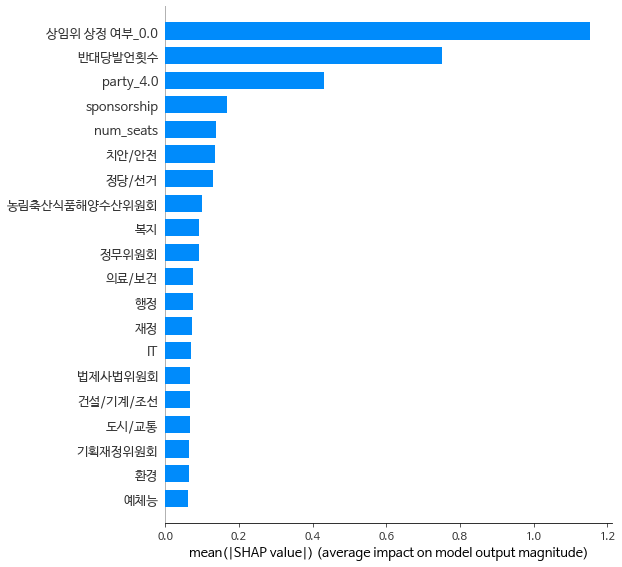

In [102]:
import shap

from matplotlib import font_manager, rc
import platform 
import matplotlib.pyplot as plt
%matplotlib inline

# 한글 폰트 사용
if platform.system() == 'Windows': 
    path = 'C:/Users/user/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    
    
    
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values( data[col] )
shap.summary_plot( shap_values , data[col] , plot_type="bar" )

Glyph 8722 missing from current font.
Glyph 8722 missing from current font.


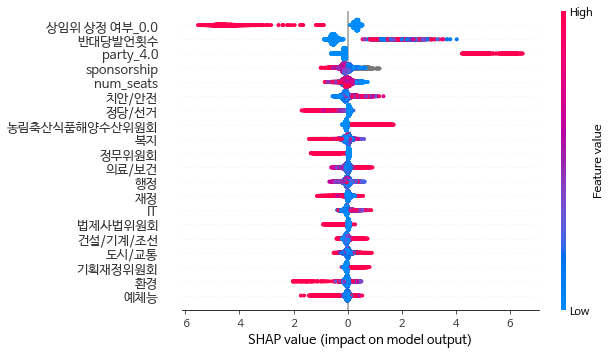

In [103]:
shap.summary_plot(shap_values, data[col],plot_type = "dot", plot_size=0.2  )

In [147]:
#제안내용 텍스트로 분류해보기

from keras.utils import np_utils


data = df_fin[['의안번호', '법안코드', '법안명', '제안자', '접수일자', '당선횟수', '공동발의자수', 
       '입법형태', '선출형태', '처리구분', 'num_seats', 'party', '제안내용_re', '보건복지위원회',
       '행정안전위원회', '산업통상자원중소벤처기업위원회', '문화체육관광위원회', '국회운영위원회', '법제사법위원회',
       '국방위원회', '국토교통위원회', '기획재정위원회', '특별위원회', '여성가족위원회', '농림축산식품해양수산위원회',
       '외교통일위원회', '정보위원회', '과학기술정보방송통신위원회', '환경노동위원회', '교육위원회', '정무위원회',
       '국회', '정당/선거', '안보', '사법', '행정', '재정', '중소기업', '에너지',
       '부동산', '금융', '자동차', '건설/기계/조선', '유통/무역', 'IT', '농축산', '복지', '의료/보건',
       '도시/교통', '교육', '환경', '노동', '치안/안전', '가족', '여성', '예체능','상임위 상정 여부', '반대당발언횟수', '공동발의평균선수',  '정당다양성']]

data = pd.get_dummies(data,columns=['입법형태','선출형태', 'party','상임위 상정 여부', '정당다양성'])
data['id']=range(len(data))

train = data.sample(13246,replace=False,random_state=2020).reset_index().drop(['index'],axis=1)
test = data.loc[ ~data['id'].isin(train['id']) ].reset_index().drop(['index'],axis=1)


train_X = train['제안내용_re']
train_Y = train['처리구분']

test_X = test['제안내용_re']
test_Y = test['처리구분']

In [148]:
for i in range(len(train_X)):
    if type(train_X[i]) == float:
        #print(i, x[i])
        train_X[i] = 'NaN'

In [134]:
tagger.morphs('NaN')

['NaN']

In [149]:
from eunjeon import Mecab
tagger = Mecab()

sentences = []
for text in train_X:
    morphs = tagger.morphs(text)
    sentences.append(morphs)

In [150]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding='post')

In [137]:
from gensim.models import Word2Vec as w2v
w2v_model = w2v.load('word2vec.model') #모델 불러오기

def get_vector(word):
    if w2v_model.wv.__contains__(word):
        return w2v_model.wv.__getitem__(word)
    else:
        return None

In [151]:
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 20))

for word, i in tokenizer.word_index.items():
    temp = get_vector(word)
    if temp is not None:
        embedding_matrix[i] = temp

In [152]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

x_encoded = tokenizer.texts_to_sequences(sentences)
max_len = max(len(l) for l in x_encoded)

In [143]:
max_len

7378

In [153]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 20, weights=[embedding_matrix], input_length= max_len, trainable=False),
    tf.keras.layers.LSTM(units=20),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 7378, 20)          389640    
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 392,941
Trainable params: 3,301
Non-trainable params: 389,640
_________________________________________________________________


In [145]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [155]:
history = model.fit(train_X, train_Y, epochs=10, batch_size=32, callbacks=[es, mc], validation_data=(test_X, test_Y))

Epoch 1/10
414/414 [==============================] - ETA: 0s - loss: 0.5940 - accuracy: 0.7266WARNING:tensorflow:Model was constructed with shape (None, 7378) for input Tensor("embedding_2_input:0", shape=(None, 7378), dtype=float32), but it was called on an input with incompatible shape (None, 1).


UnimplementedError:  Cast string to float is not supported
	 [[node sequential_2/Cast (defined at <ipython-input-155-a1b68e911080>:1) ]] [Op:__inference_test_function_12488]

Function call stack:
test_function


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

In [ ]:
sentences = [sentence.split(' ') for sentence in test_X]
tokenizer.fit_on_texts(sentences)
test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(train_X, padding='post')

model.evaluate(test_X, test_Y, verbose=0)

In [ ]:
from keras.models import load_model
model.save('mnist_mlp_model.h5')

In [ ]:
yhat = model.predict_classes(df_fin['제안내용_re'])

In [ ]:
df_fin['summary_predicted'] = yhat